In [16]:
import pandas as pd 
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report,log_loss,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

In [4]:
cancer = pd.read_csv(r"C:\Users\Anonymous\Desktop\Advance Statistics\Cancer\Cancer.csv")
cancer.head()

,subjid,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,1,40-49,premeno,15-19,0-2,yes,three,right,left_up,no,recurrence-events
1,2,50-59,ge40,15-19,0-2,no,one,right,central,no,no-recurrence-events
2,3,50-59,ge40,35-39,0-2,no,two,left,left_low,no,recurrence-events
3,4,40-49,premeno,35-39,0-2,yes,three,right,left_low,yes,no-recurrence-events
4,5,40-49,premeno,30-34,5-Mar,yes,two,left,right_up,no,recurrence-events


In [6]:
dum_cancer = pd.get_dummies(cancer,drop_first = True)
dum_cancer.head()

,subjid,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_14-Oct,tumor-size_15-19,...,node-caps_yes,deg-malig_three,deg-malig_two,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes,Class_recurrence-events
0,1,0,1,0,0,0,0,1,0,1,...,1,1,0,1,0,1,0,0,0,1
1,2,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,3,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3,4,0,1,0,0,0,0,1,0,0,...,1,1,0,1,1,0,0,0,1,0
4,5,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,1


In [7]:
dum_cancer.dtypes

subjid                     int64
age_30-39                  uint8
age_40-49                  uint8
age_50-59                  uint8
age_60-69                  uint8
age_70-79                  uint8
menopause_lt40             uint8
menopause_premeno          uint8
tumor-size_14-Oct          uint8
tumor-size_15-19           uint8
tumor-size_20-24           uint8
tumor-size_25-29           uint8
tumor-size_30-34           uint8
tumor-size_35-39           uint8
tumor-size_40-44           uint8
tumor-size_45-49           uint8
tumor-size_50-54           uint8
tumor-size_9-May           uint8
inv-nodes_11-Sep           uint8
inv-nodes_14-Dec           uint8
inv-nodes_15-17            uint8
inv-nodes_24-26            uint8
inv-nodes_5-Mar            uint8
inv-nodes_8-Jun            uint8
node-caps_yes              uint8
deg-malig_three            uint8
deg-malig_two              uint8
breast_right               uint8
breast-quad_left_low       uint8
breast-quad_left_up        uint8
breast-qua

In [8]:
dum_cancer = dum_cancer.astype(int)

In [9]:
dum_cancer.dtypes

subjid                     int32
age_30-39                  int32
age_40-49                  int32
age_50-59                  int32
age_60-69                  int32
age_70-79                  int32
menopause_lt40             int32
menopause_premeno          int32
tumor-size_14-Oct          int32
tumor-size_15-19           int32
tumor-size_20-24           int32
tumor-size_25-29           int32
tumor-size_30-34           int32
tumor-size_35-39           int32
tumor-size_40-44           int32
tumor-size_45-49           int32
tumor-size_50-54           int32
tumor-size_9-May           int32
inv-nodes_11-Sep           int32
inv-nodes_14-Dec           int32
inv-nodes_15-17            int32
inv-nodes_24-26            int32
inv-nodes_5-Mar            int32
inv-nodes_8-Jun            int32
node-caps_yes              int32
deg-malig_three            int32
deg-malig_two              int32
breast_right               int32
breast-quad_left_low       int32
breast-quad_left_up        int32
breast-qua

In [11]:
dum_cancer.columns

Index(['subjid', 'age_30-39', 'age_40-49', 'age_50-59', 'age_60-69',
       'age_70-79', 'menopause_lt40', 'menopause_premeno', 'tumor-size_14-Oct',
       'tumor-size_15-19', 'tumor-size_20-24', 'tumor-size_25-29',
       'tumor-size_30-34', 'tumor-size_35-39', 'tumor-size_40-44',
       'tumor-size_45-49', 'tumor-size_50-54', 'tumor-size_9-May',
       'inv-nodes_11-Sep', 'inv-nodes_14-Dec', 'inv-nodes_15-17',
       'inv-nodes_24-26', 'inv-nodes_5-Mar', 'inv-nodes_8-Jun',
       'node-caps_yes', 'deg-malig_three', 'deg-malig_two', 'breast_right',
       'breast-quad_left_low', 'breast-quad_left_up', 'breast-quad_right_low',
       'breast-quad_right_up', 'irradiat_yes', 'Class_recurrence-events'],
      dtype='object')

In [12]:
X = dum_cancer.drop(['subjid','Class_recurrence-events'],axis = 1)
y = dum_cancer['Class_recurrence-events']

In [13]:
X_train ,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=23)
nb = BernoulliNB()

### Apriori Probabilities Calculation

nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[49 11]
 [14 12]]
0.7093023255813954
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        60
           1       0.52      0.46      0.49        26

    accuracy                           0.71        86
   macro avg       0.65      0.64      0.64        86
weighted avg       0.70      0.71      0.70        86



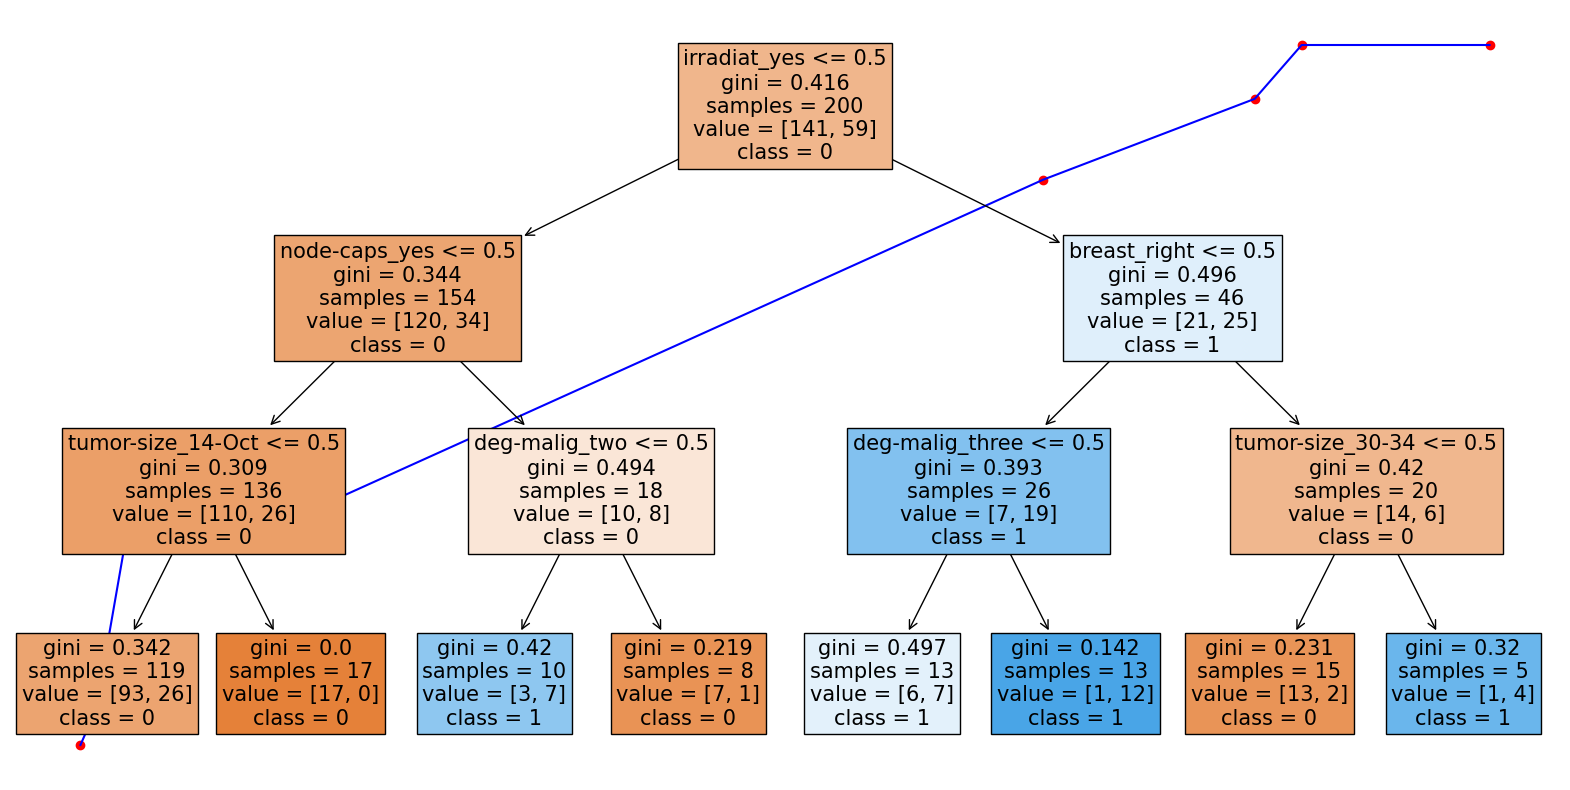

0.6368589743589743
0.58420779203882


In [17]:
### We help of Decision Tree

dtc = DecisionTreeClassifier(random_state=23,max_depth=3)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

plt.figure(figsize=(20,10))
tree.plot_tree(dtc,feature_names=X_train.columns,filled = True,fontsize=15,class_names=['0','1'])
y_pred_prob = dtc.predict_proba(X_test)

comp_prob1 = pd.DataFrame(y_pred_prob,columns = ['P(y=0)','P(y=1)'])
comp_prob1['Actual'] = y_test.values
comp_prob1['Predicted'] = y_pred

comp_prob1.to_csv("comp_prob1.csv")

from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import log_loss

y_pred_prob = dtc.predict_proba(X_test)
roc_results = roc_curve(y_test,y_pred_prob[:,1])
fpr = roc_results[0]
tpr = roc_results[1]

plt.scatter(fpr,tpr,c ="red")
plt.plot(fpr,tpr,c = "blue")
plt.xlabel("1-Spec")
plt.ylabel("Sens")
plt.show()


print(roc_auc_score(y_test,y_pred_prob[:,1]))
print(log_loss(y_test,y_pred_prob[:,1]))

In [1]:
############# GLASS 
from sklearn.preprocessing import LabelEncoder

In [4]:
glass = pd.read_csv(r"C:\Users\Anonymous\Desktop\Machine Learning\Glass Identification\glass.csv")

In [5]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [6]:
X = glass.drop('Type',axis = 1)
y = glass['Type']

In [7]:
lbl = LabelEncoder()
y = lbl.fit_transform(y)
print(lbl.classes_)

['building_windows_float_processed' 'building_windows_non_float_processed'
 'containers' 'headlamps' 'tableware' 'vehicle_windows_float_processed']


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=23)

In [12]:
nb = GaussianNB()
## Apriori probablities calculations
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print("Classification_report",classification_report(y_test,y_pred))
y_pred_prob = nb.predict_proba(X_test)
print(log_loss(y_test,y_pred_prob))

Classification_report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.60      0.13      0.21        23
           2       0.36      1.00      0.53         4
           3       0.89      0.89      0.89         9
           4       0.67      0.67      0.67         3
           5       0.09      0.60      0.16         5

    accuracy                           0.31        65
   macro avg       0.44      0.55      0.41        65
weighted avg       0.40      0.31      0.27        65

6.141328235186084


In [ ]:
### Precision: Precision measures the proportion of true positive predictions out of all positive predictions. A higher precision indicates a lower number of false positives.
### Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of all actual positive instances in the dataset. A higher recall indicates a lower number of false negatives.
### F1-score: The F1-score is the harmonic mean of precision and recall. It balances both metrics and is useful when you want to consider both false positives and false negatives. A higher F1-score indicates a better balance between precision and recall.
#### Support: The support indicates the number of instances (samples) for each class in the testing set.

In [ ]:
#Overall Accuracy:
#The accuracy of the model is calculated as the proportion of correct predictions (true positives and true negatives) out of the total number of predictions. In this case, the overall accuracy is 0.31, which means that the model correctly predicted 31% of the samples in the testing set.
###Log Loss:The log_loss value (6.14) is a measure of how well the predicted probabilities match the true labels. A lower log_loss value indicates better predictions and a higher level of confidence in those predictions.

In [1]:
###From the classification_report, we can observe that the model performs well for some classes (e.g., Class 3 with high precision, recall, and F1-score) but poorly for others (e.g., Class 0 with zero precision and recall). This indicates that the model might be struggling to distinguish between certain classes due to data imbalances or other complexities.


In the context of the "glass" dataset, the classes represent different categories or types of glass. Each row in the dataset corresponds to a sample of glass, and the "Type" column indicates the class or category to which that glass sample belongs. 
For example:

Class 0: building_windows_float_processed
Class 1: building_windows_non_float_processed
Class 2: vehicle_windows_float_processed
Class 3: vehicle_windows_non_float_processed
Class 4: containers
Class 5: tableware
Class 6: headlamps
    
when you see in the classification_report metrics for "Class 0," it means the evaluation results for the class "building_windows_float_processed." Similarly, "Class 1" corresponds to "building_windows_non_float_processed," and so on.
For instance, if we look at the classification_report and see that "Class 3" has high precision, recall, and F1-score, it means that the model is performing well in correctly predicting samples belonging to the "vehicle_windows_non_float_processed" class.

This information helps you understand how the model is performing for each specific class. Improving the performance for specific classes might involve handling data imbalances or exploring other strategies to address the complexities associated with those classes.



Data Imbalance Handling:

Resampling: Consider using techniques like oversampling the minority class, undersampling the majority class, or generating synthetic samples (SMOTE) to balance the class distribution in the training data.
Class Weights: Assign higher weights to the minority class during model training to make it more influential in the learning process.
Feature Engineering:

Explore and select relevant features that have a significant impact on the target variable. You can use techniques like feature importance from tree-based models or correlation analysis to identify important features.
Hyperparameter Tuning:

Experiment with different hyperparameter values for the Gaussian Naive Bayes classifier. You can use techniques like grid search or random search to find the optimal hyperparameters that improve the model's performance.
Cross-Validation:

Use cross-validation techniques like k-fold cross-validation to validate the model's performance on different subsets of the data. This helps in obtaining a more reliable estimate of the model's accuracy and generalization.
Try Different Algorithms:

Compare the performance of Gaussian Naive Bayes with other classification algorithms like Decision Trees, Random Forests, Support Vector Machines (SVM), or Gradient Boosting Machines (GBM). Different algorithms may perform differently on the dataset, and trying alternatives can help you find a better-performing model.
Model Ensemble:

Consider using model ensemble techniques like Bagging or Boosting. Ensembling combines predictions from multiple models to improve overall performance and reduce overfitting.
Data Preprocessing:

Preprocess the data to handle missing values, outliers, and scale the features if necessary. Standardizing or normalizing features can improve the convergence and performance of some algorithms.
Iterative Improvement:

Continuously iterate through the steps above, experimenting with different strategies, and monitoring the model's performance. Fine-tune the process until you achieve the desired accuracy.
Analyze Misclassifications:

Examine the misclassified samples to identify patterns or common characteristics that the model is struggling to learn. This analysis can provide insights into potential areas for improvement.
By following these steps, you can work towards optimizing the model and improving its accuracy to the desired range. Keep in mind that the success of optimization depends on the characteristics of the dataset, the quality of features, and the complexity of the problem.



In [2]:
################### BankRuptcy dataset ##############

In [6]:
brupt = pd.read_csv(r"C:\Users\Anonymous\Desktop\Advance Statistics\Bankruptcy\Bankruptcy.csv")
brupt.head()

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06


In [8]:
X = brupt.drop(['NO','YR','D'],axis = 1)
y = brupt['D']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23,stratify=y)

In [18]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_proba = nb.predict_proba(X_test)
print(log_loss(y_test,y_pred_proba[:,1]))
### Predict Probabilities and Compute Log Loss:
   #After training the classifier, it predicts the probabilities for class 1 (bankruptcy) for the test data using predict_proba.
  #The probabilities for class 1 are obtained from y_pred_proba[:,1].

1.4199623059151014


In [19]:
scores = []
depth_values = [1,2,3,4,5,6,7,8,9,10]
for depth in depth_values:
    dtc = DecisionTreeClassifier(max_depth=depth,random_state=23)
    dtc.fit(X_train,y_train)
    y_pred_proba = dtc.predict_proba(X_test)
    scores.append(log_loss(y_test,y_pred_proba[:,1]))
i_min = np.argmin(scores)
### the code finds the index of the minimum log loss in the scores list using np.argmin(scores)
print("Best Depth = ",depth_values[i_min])
###The best depth is obtained by indexing the depth_values list with the index found in the previous step.
print("Best Log Loss score =",np.min(scores))
The minimum log loss score is also obtained using np.min(scores)
## The best depth is the one that results in the lowest log loss, indicating a well-calibrated and well-performing model

Best Depth =  2
Best Log Loss score = 0.5395516402068884


To further optimize the model and reduce the log loss, you can try the following approaches:

Feature Engineering: Analyze the features in the dataset and identify if any feature engineering can be performed. Feature engineering involves creating new features or transforming existing features to better represent the underlying patterns in the data. It may include scaling, normalization, or combining features to make them more informative for the model.

Hyperparameter Tuning: Experiment with different hyperparameters for the classifier. For Decision Trees, you can tune parameters such as max_depth, min_samples_split, min_samples_leaf, and criterion. Grid search or random search techniques can be used to find the best combination of hyperparameters that results in lower log loss.

Ensemble Methods: Consider using ensemble methods like Random Forest or Gradient Boosting, which combine multiple weak learners to create a stronger model. Ensemble methods can often improve predictive performance compared to individual classifiers.

Handling Class Imbalance: If the dataset has imbalanced classes, where one class significantly outweighs the other, the model might become biased towards the majority class. Techniques like oversampling, undersampling, or using class weights can help address class imbalance and improve model performance.

Data Preprocessing: Ensure the dataset is clean and free from missing values or outliers. Appropriate data preprocessing techniques like imputation, outlier removal, or data normalization can help the model learn better representations.

Use Different Algorithms: Experiment with other classification algorithms like Support Vector Machines (SVM), k-Nearest Neighbors (kNN), or Neural Networks. Different algorithms have different strengths and weaknesses, and the best-performing algorithm might vary depending on the dataset.

Cross-Validation: Use cross-validation techniques like k-fold cross-validation to assess the model's performance more accurately. Cross-validation helps in estimating the model's generalization ability on unseen data and reduces the risk of overfitting.

Handling Missing Data: Consider exploring different techniques to handle missing data, such as imputation or dropping columns/rows with a significant number of missing values. Imputation methods can help retain valuable information while dealing with missing data.

More Data: If possible, collect more data to increase the size of the dataset. More data can help the model generalize better and reduce overfitting.

Regularization: For certain algorithms like Logistic Regression or Neural Networks, regularization techniques like L1 or L2 regularization can prevent overfitting and improve generalization.